# Work in a pylab session: clean basic tools

In [6]:
# This %pylab magic line loads numpy, scipy, matplotlib. 
# add the word inline to put figures inline
%pylab inline
# plt.xkcd();

Populating the interactive namespace from numpy and matplotlib


### Make "red" noise, by specifying the scale for exponential autocorrelation. 

### How do you choose that scale? 
Reasoning: 

Red noise has covariance that drops off exponentially with lag. So if C0 is the variance of the series, and C1 the covariance at a one-step lag, we want to know the value of $\tau_{eff}$ for which $C1/C0 = exp(\delta t / \tau_{efold})$. Solving, $\tau_{efold} = \delta t /ln(C1/C0) = \delta t /ln(r1)$ where $r1$ is the autocorrelation at lag 1. You can type corrcoef(y, roll(y,1)) to see its value. The function roll(y,1) shifts an array y by one slot periodically. (This is careless about endpoint effects.) 

In [22]:
# var(y) 
# corrcoef(y, roll(y,1))
# len(y)

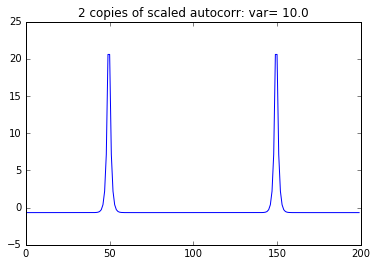

In [49]:
# Let's mimick a data array y 
# using AR1 red noise. 
# It only depends on autoregression at lag 1 (hence an "AR1 process")

lag1_autocorr = 0.9  # Read off this value from corrcoef(y, roll(y,1))
variance = 10        # Read off this value from var(y) 
N = 100              # Read off this value from len(y)  

T_efold = 1.0/log(lag1_autocorr) # Units: number of array positions
T_efold

x = arange(N)              # A simple count array
xpert = x-mean(x)  
yauto = exp(- abs(xpert))  # Autocorrelation
# Scale it to have the given variance
yauto *= sqrt(variance/var(yauto))

yauto = detrend(yauto) 
plot(concatenate([yauto,yauto]))
title('2 copies of scaled autocorr: var='+format(var(yauto),'5.3'));

## Make the complex spectrum, using fft
...normalizing by input series length, since science doesn't want the *values* of spectra to depend on sampling rate (and thus N)

In [50]:
N = len(yauto) 
spec = fft.fft(yauto) /N

# Unpack in all the usual ways: real (cos) and imaginary (sin)
specr = real(spec)
speci = imag(spec)

# Unpack in all the usual ways: amplitude and phase
ampli = abs(spec)
phase = angle(spec)

## Reconstruct (synthesize) data by meddling with phase. 

In [51]:
# Edit the spectrum's phase and amplitude:
syn_ampli = ampli

# Phase = rand() makes synthetic data
syn_phase = 2*pi*rand( len(phase) )

### Build spectrum from edited amplitude and phase, then ifft

In [52]:
# Build the synthetic spectrum from real and imaginary parts
syn_spec =(    syn_ampli*cos(syn_phase)   #real part
         + 1j* syn_ampli*sin(syn_phase) ) #imag part

# Synthesize back into physical space (time domain) with ifft: 
# First, we have to rescale by N = len(y). 
# And there is a near-zero imaginary part; strip it off with real()
syn_data = real( ifft(syn_spec)*N )

### Display the synthetic data on the raw data (Fig. 1)

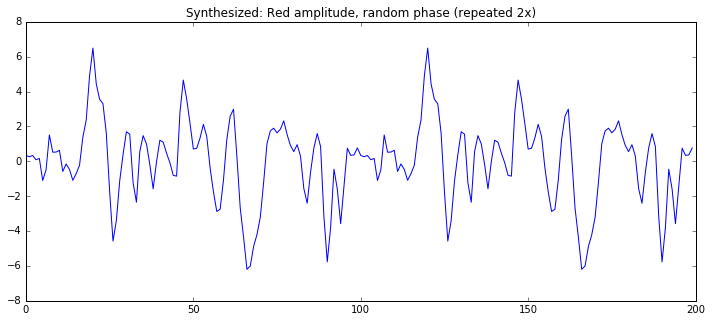

In [53]:
figure(6, figsize=[12,5])
plot(tile(syn_data,2))
title('Synthesized: Red amplitude, random phase (repeated 2x)');

## More realizations with random phases

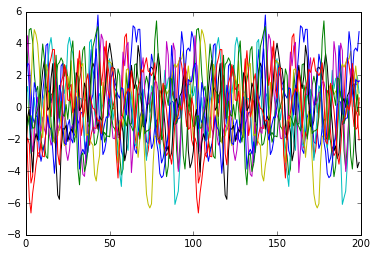

In [54]:
for i in arange(10): 
    syn_phase = 2*pi*rand( len(phase) )
    
    syn_spec =(    syn_ampli*cos(syn_phase)   #real part
             + 1j* syn_ampli*sin(syn_phase) ) #imag part
    
    syn_data = real( ifft(syn_spec)*N )
    plot(tile(syn_data,2))

### Synthetic data, from an autocorrelation function decay scale